In [66]:
!pip install xgboost


In [67]:
!pip install tensorflow

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import re

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif,f_regression

from sklearn.model_selection import train_test_split

import xgboost as xgb

import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

from tensorflow.keras.layers import Dense, Dropout, Activation
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from xgboost import XGBRegressor

from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import Sequential
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')


In [4]:
#Uploading dataset

In [5]:
df=pd.read_csv("SolarPrediction.csv")


In [6]:
#datapreprocessing

In [7]:
df.head(5)

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [9]:
df.isnull().sum()

UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

In [11]:
print(df.dtypes)

UNIXTime                    int64
Data                       object
Time                       object
Radiation                 float64
Temperature                 int64
Pressure                  float64
Humidity                    int64
WindDirection(Degrees)    float64
Speed                     float64
TimeSunRise                object
TimeSunSet                 object
dtype: object


In [12]:
df.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


In [13]:
# Convert 'Data', 'Time', 'TimeSunRise', 'TimeSunSet' to datetime format
df['Data'] = pd.to_datetime(df['Data'], errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')
df['TimeSunRise'] = pd.to_datetime(df['TimeSunRise'], errors='coerce')
df['TimeSunSet'] = pd.to_datetime(df['TimeSunSet'], errors='coerce')


In [14]:
# Extract useful features from 'TimeSunRise' and 'TimeSunSet'
df['Sunrise_Hour'] = df['TimeSunRise'].dt.hour
df['Sunrise_Minute'] = df['TimeSunRise'].dt.minute
df['Sunset_Hour'] = df['TimeSunSet'].dt.hour
df['Sunset_Minute'] = df['TimeSunSet'].dt.minute
df['Hour'] = df['Time'].dt.hour


In [15]:
df.drop(['UNIXTime','Data','Time','TimeSunRise','TimeSunSet'],axis=1,inplace=True)

In [17]:
# Features and target
features = ['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed']
X = df[features]
y = df['Radiation']

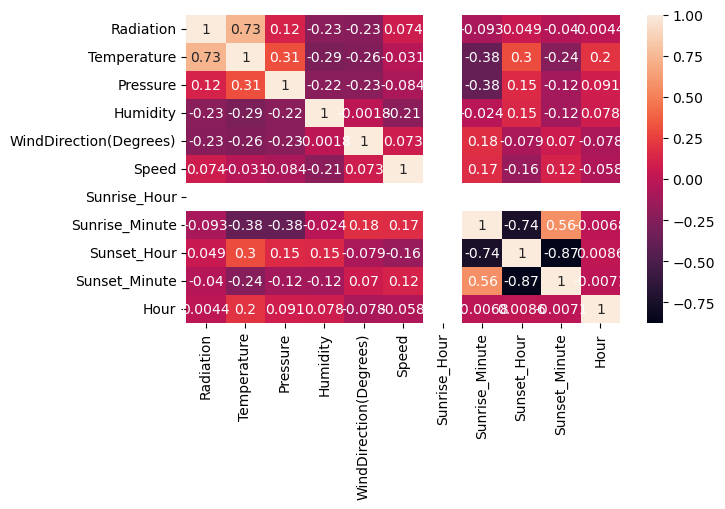

In [18]:
cor=df.corr()
plt.figure(figsize=(7,4))
sns.heatmap(cor,annot=True)
plt.show()

In [19]:
#Feature Selection

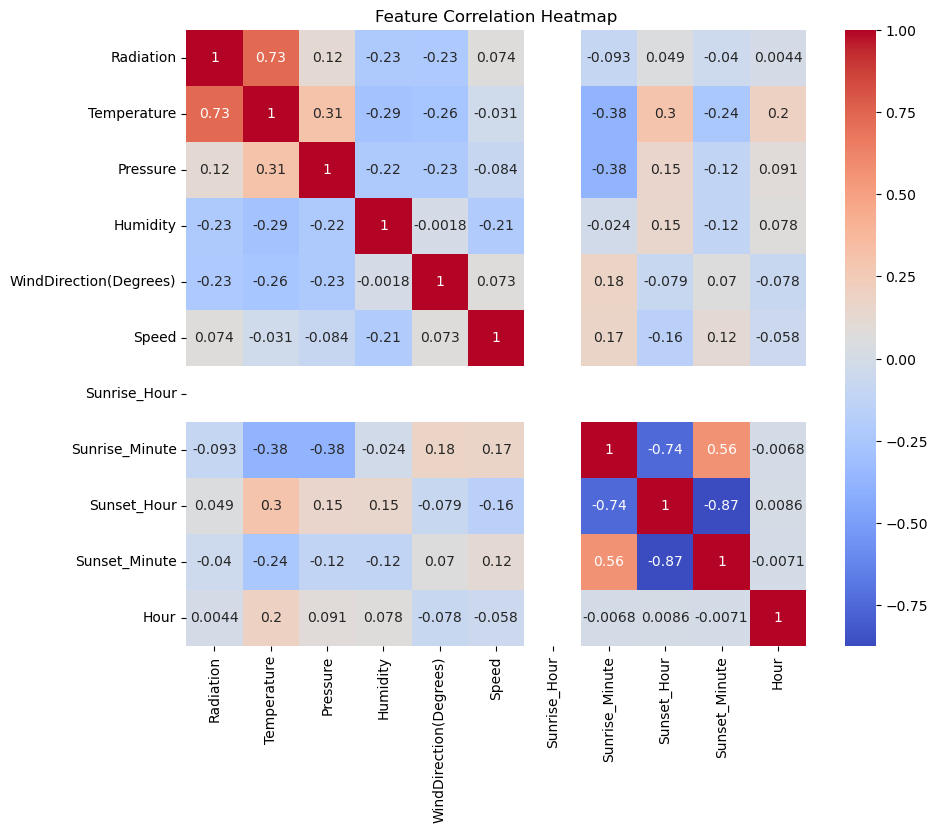

In [33]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [49]:
df.dropna(inplace=True)
X = df.drop(columns=['Radiation'])
y = df['Radiation']

In [51]:
# 3. Feature Engineering — creating interaction features before selection
X['Temp_Speed'] = X['Temperature'] * X['Speed']
X['Humidity_Pressure'] = X['Humidity'] * X['Pressure']

In [53]:
# 4. Feature Selection
selector = SelectKBest(score_func=f_regression, k=6)
X_selected = selector.fit_transform(X, y)
selected_columns = X.columns[selector.get_support()]


In [55]:
X = X[selected_columns]

# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
# 7. Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)

In [70]:
# 8. XGBoost
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train_scaled, y_train)
xgb_pred = xgb.predict(X_test_scaled)

In [75]:
# 9. SGD Regressor
sgd = SGDRegressor(random_state=42, max_iter=1000, tol=1e-3)
sgd.fit(X_train_scaled, y_train)
sgd_pred = sgd.predict(X_test_scaled)

In [74]:
# 10. Adam-based Neural Network
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dense(64, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train_scaled, y_train, epochs=100, verbose=0)
adam_pred = model.predict(X_test_scaled).flatten()


205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [78]:
# 11. Evaluation
def print_metrics(name, y_test, y_pred):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} RMSE: {rmse:.2f}")
    print(f"{name} R²: {r2:.2f}")
    print(f"{name} MSE: {mse:.2f}\n")

In [80]:
print_metrics("Random Forest", y_test, rf_pred)
print_metrics("XGBoost", y_test, xgb_pred)
print_metrics("SGD", y_test, sgd_pred)
print_metrics("Adam", y_test, adam_pred)

Random Forest RMSE: 159.06
Random Forest R²: 0.75
Random Forest MSE: 25300.65

XGBoost RMSE: 164.81
XGBoost R²: 0.73
XGBoost MSE: 27161.60

SGD RMSE: 209.38
SGD R²: 0.56
SGD MSE: 43841.87

Adam RMSE: 169.33
Adam R²: 0.71
Adam MSE: 28673.17



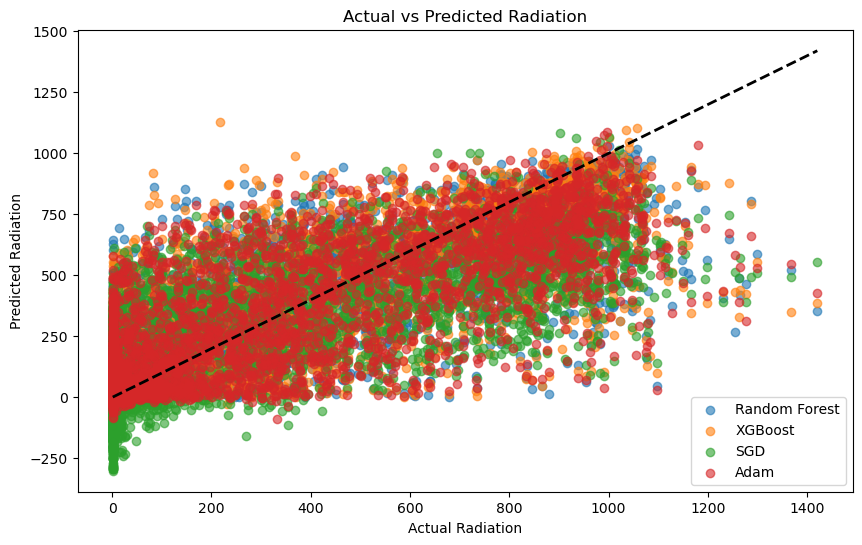

In [82]:
# 12. Visualization: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_pred, label='Random Forest', alpha=0.6)
plt.scatter(y_test, xgb_pred, label='XGBoost', alpha=0.6)
plt.scatter(y_test, sgd_pred, label='SGD', alpha=0.6)
plt.scatter(y_test, adam_pred, label='Adam', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Radiation')
plt.ylabel('Predicted Radiation')
plt.title('Actual vs Predicted Radiation')
plt.legend()
plt.show()

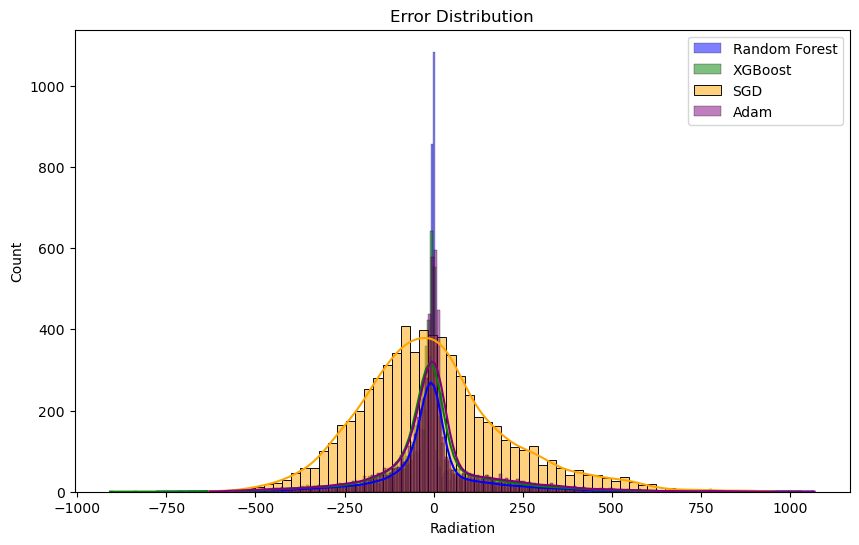

In [84]:
# 13. Distribution Plot
plt.figure(figsize=(10, 6))
sns.histplot(y_test - rf_pred, kde=True, label='Random Forest', color='blue', alpha=0.5)
sns.histplot(y_test - xgb_pred, kde=True, label='XGBoost', color='green', alpha=0.5)
sns.histplot(y_test - sgd_pred, kde=True, label='SGD', color='orange', alpha=0.5)
sns.histplot(y_test - adam_pred, kde=True, label='Adam', color='purple', alpha=0.5)
plt.legend()
plt.title('Error Distribution')
plt.show()

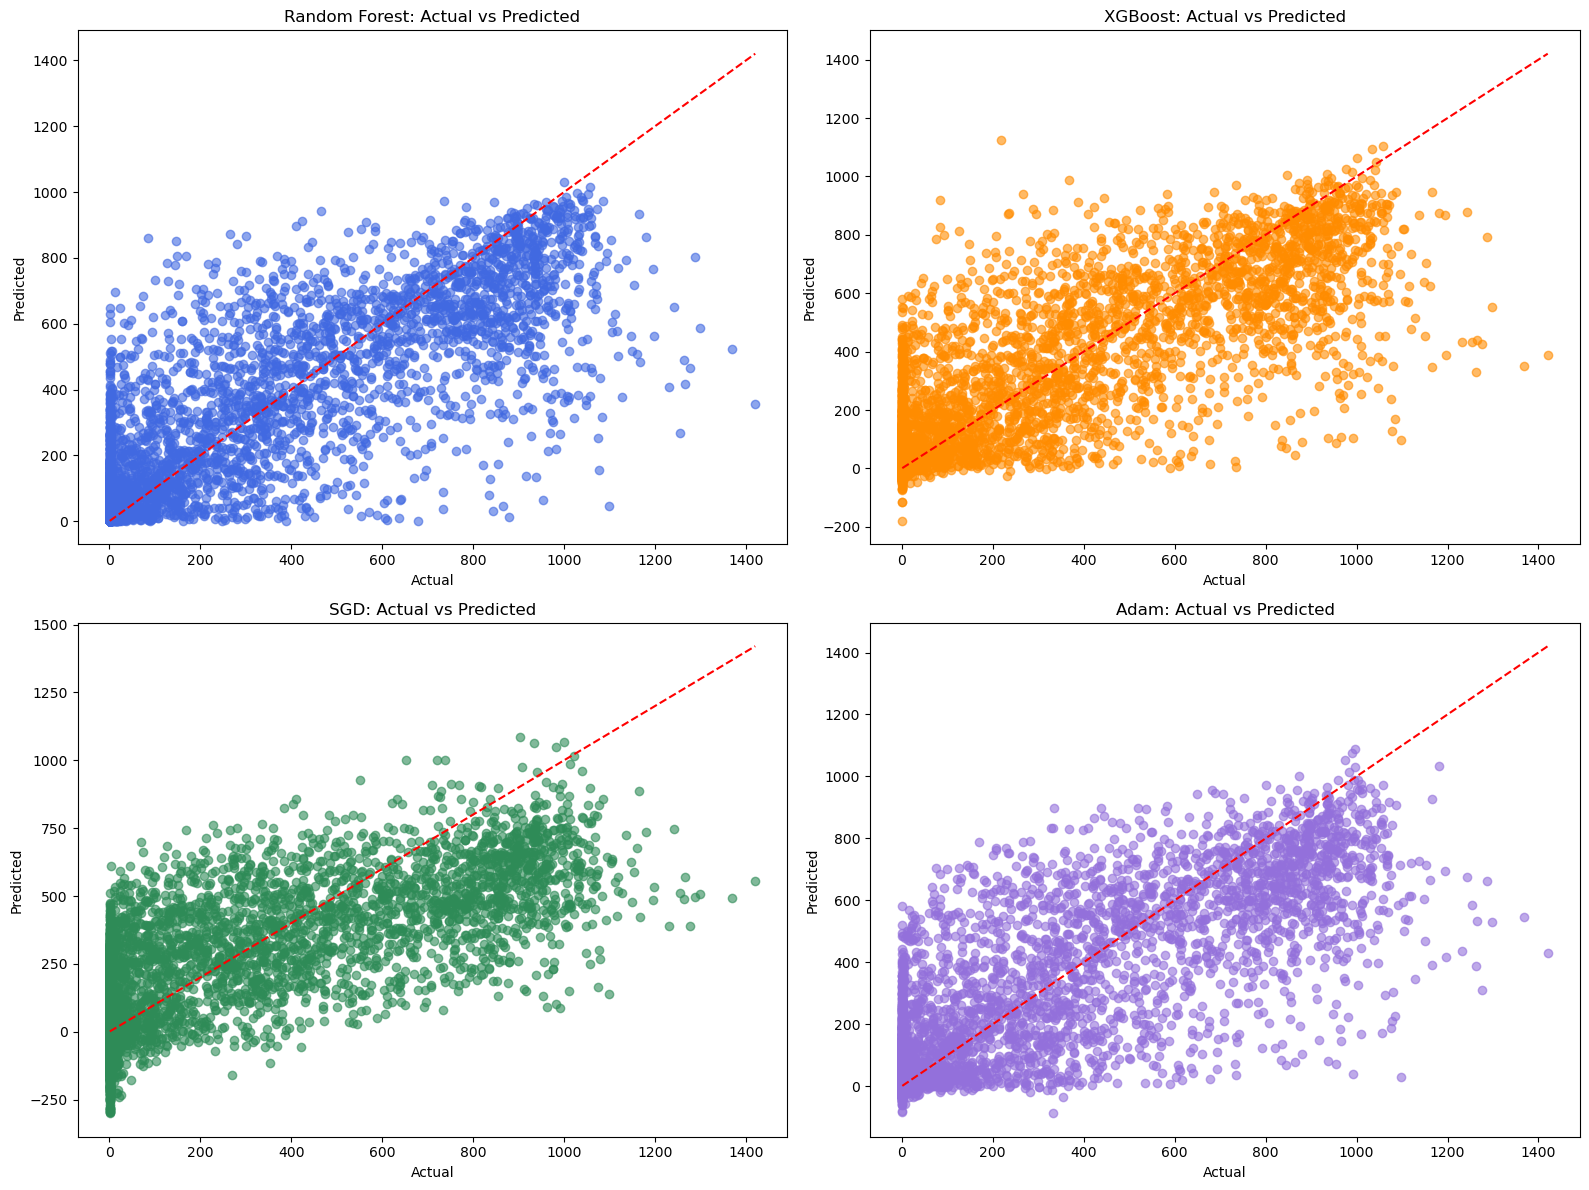

In [86]:
plt.figure(figsize=(16, 12))

# Random Forest
plt.subplot(2, 2, 1)
plt.scatter(y_test, rf_pred, color='royalblue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest: Actual vs Predicted')

# XGBoost
plt.subplot(2, 2, 2)
plt.scatter(y_test, xgb_pred, color='darkorange', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('XGBoost: Actual vs Predicted')

# SGD
plt.subplot(2, 2, 3)
plt.scatter(y_test, sgd_pred, color='seagreen', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SGD: Actual vs Predicted')

# Adam
plt.subplot(2, 2, 4)
plt.scatter(y_test, adam_pred.flatten(), color='mediumpurple', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Adam: Actual vs Predicted')

plt.tight_layout()
plt.show()

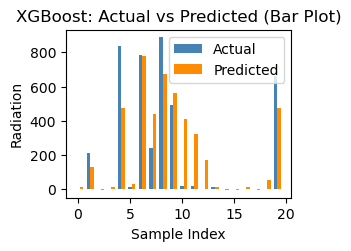

In [94]:
sample_indices = np.random.choice(len(y_test), size=20, replace=False)
sample_actual = y_test.iloc[sample_indices]
sample_pred = xgb_pred[sample_indices]

plt.subplot(2, 2, 2)
bar_width = 0.35
index = np.arange(len(sample_indices))

plt.bar(index, sample_actual, bar_width, label='Actual', color='steelblue')
plt.bar(index + bar_width, sample_pred, bar_width, label='Predicted', color='darkorange')
plt.xlabel('Sample Index')
plt.ylabel('Radiation')
plt.title('XGBoost: Actual vs Predicted (Bar Plot)')
plt.legend()




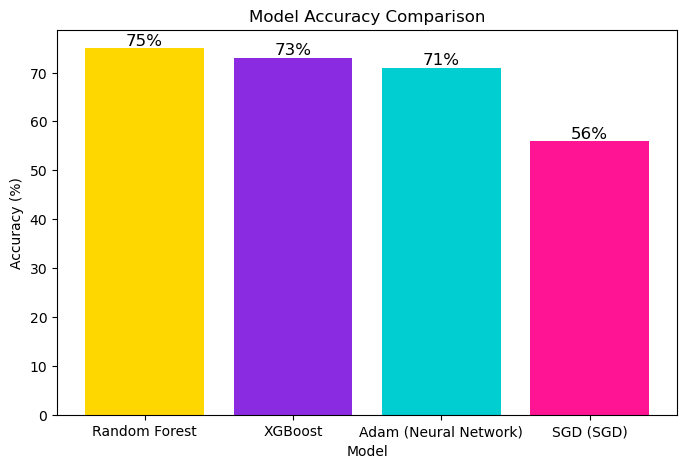

In [132]:
models = ['Random Forest', 'XGBoost', 'Adam (Neural Network)', 'SGD (SGD)']
accuracy = [75, 73, 71, 56]

# Bar colors (using custom colors for each model)
colors = [
          '#FFD700',  # bold gold
          '#8A2BE2',  # strong purple
          '#00CED1',  # turquoise
          
          '#FF1493',]  # deep pink
         

# Create the bar plot
plt.figure(figsize=(8, 5))  # Adjust figure size
bars = plt.bar(models, accuracy, color=colors)

# Adding labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')

# Display the value of each bar on top of the bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0, f'{yval}%', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.show()
